PythonStock（10）：使用notebook + tushare + pandas 简单的股票分析，蜡烛图
https://blog.csdn.net/freewebsys/article/details/78294566<br>
使用mpl_finance画股票K线图 https://blog.csdn.net/weixin_43858148/article/details/84637147

需安装的第三方模块：
mpl_finance：方法：pip install mpl_finance

In [1]:
import pandas as pd
import tushare as ts
import datetime
import matplotlib
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
import matplotlib.pyplot as plt
import mpl_finance as mpf #注意这里对于mpl_finance的导入
import matplotlib.ticker as ticker

In [2]:
begin_time = '2018-07-01'
end_time = '2019-01-16'
code = "000848"
df = ts.get_hist_data(code, start=begin_time, end=end_time)
df = df.sort_index(0) #按日期升序
df_idx = df.index.values
print(type(df_idx))
#df_idx

<class 'numpy.ndarray'>


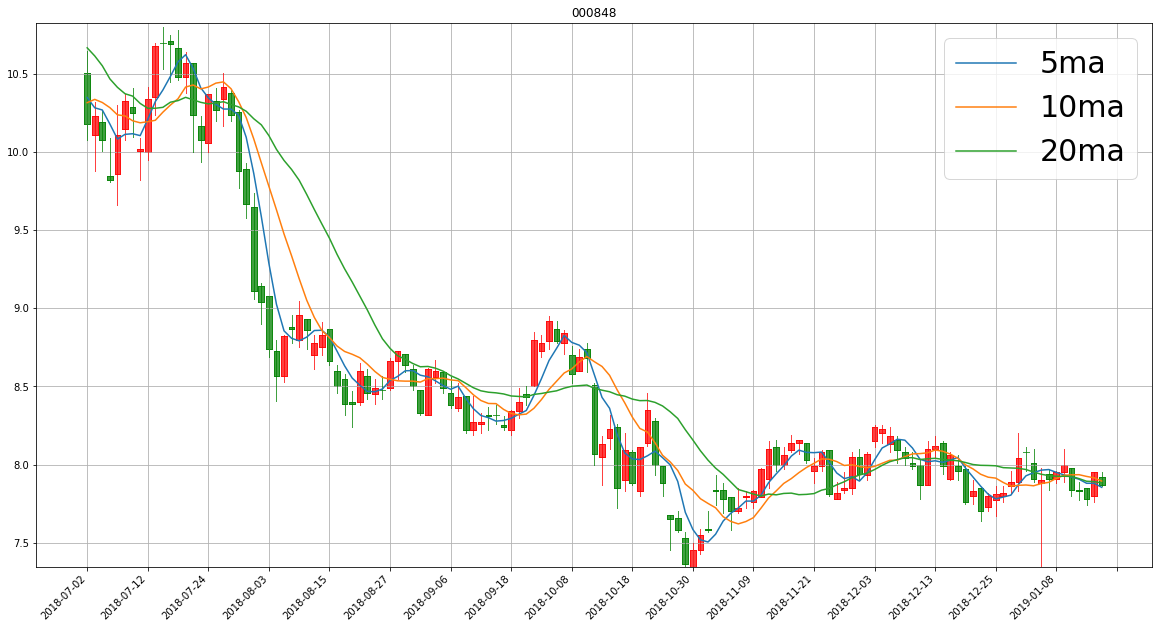

In [17]:
#    df.plot()

fig, ax = plt.subplots(figsize=(20, 10)) # 设置图片大小。

# https://matplotlib.org/api/finance_api.html#module-matplotlib.finance
# matplotlib.finance.candlestick2_ochl(ax, opens, closes, highs, lows, width=4, colorup='r', colordown='g', alpha=0.75)
mpf.candlestick2_ochl(ax = ax, 
                 opens=df["open"].values, closes=df["close"].values,
                 highs=df["high"].values, lows=df["low"].values, 
                 width=0.75, colorup='r', colordown='g', alpha=0.75)

#设置刻度间隔，ticker.MaxNLocator(N)表示在适当位置找到最多为N的带刻度的间隔数。
#具体参阅:https://matplotlib.org/api/ticker_api.html
ax.xaxis.set_major_locator(ticker.MaxNLocator(20)) 

# 设置自动格式化时间。
def mydate_formatter(x,pos):
    try:
        return df_idx[int(x)]
    except IndexError:
        return ''
ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter)) #设置刻度格式化函数

plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right') #plt.gca()获取当前坐标轴
ax.grid(True)
plt.title(code)

plt.plot(df['ma5'],label='5ma')
plt.plot(df['ma10'],label='10ma')
plt.plot(df['ma20'],label='20ma')
plt.legend(loc='upper right',fontsize=30)
plt.show()